In [10]:
import pandas as pd

df = pd.read_csv("testing_data_final.csv")  # Replace with your CSV file path
print(df.head())


   id_semester_evaluation  sem_present_count  sem_absent_count  \
0                       1                 96                 4   
1                       2                 90                10   
2                       3                 88                12   
3                       4                 97                 3   
4                       5                 78                22   

   sem_eval_lec_test_1_mark  sem_eval_lab_test_1_mark  \
0                        26                        27   
1                        22                        19   
2                        21                        20   
3                        29                        29   
4                        16                        18   

   semester_evaluation_mid_mark  sem_eval_lec_test_2_mark  \
0                            27                        26   
1                            21                        21   
2                            21                        19   
3               

In [11]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id_semester_evaluation             69 non-null     int64
 1   sem_present_count                  69 non-null     int64
 2   sem_absent_count                   69 non-null     int64
 3   sem_eval_lec_test_1_mark           69 non-null     int64
 4   sem_eval_lab_test_1_mark           69 non-null     int64
 5   semester_evaluation_mid_mark       69 non-null     int64
 6   sem_eval_lec_test_2_mark           69 non-null     int64
 7   sem_eval_lab_test_2_mark           69 non-null     int64
 8   semester_evaluation_pre_gtu_mark   69 non-null     int64
 9   semester_evaluation_internal_mark  69 non-null     int64
 10  semester_evaluation_gtu_mark       69 non-null     int64
dtypes: int64(11)
memory usage: 6.1 KB
None
       id_semester_evaluation  sem_present_coun

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: -0.10213665761727198
MSE: 271.830985234724


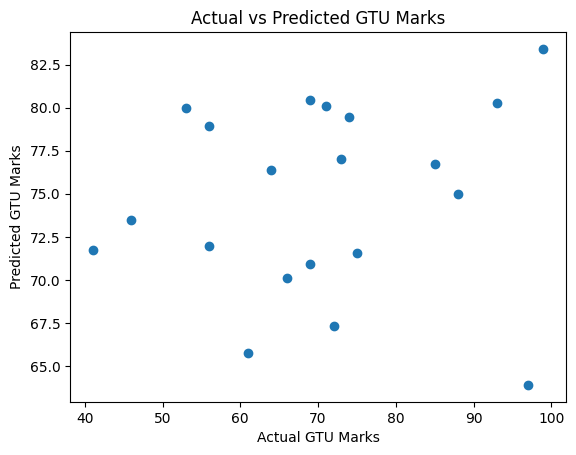

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual GTU Marks")
plt.ylabel("Predicted GTU Marks")
plt.title("Actual vs Predicted GTU Marks")
plt.show()


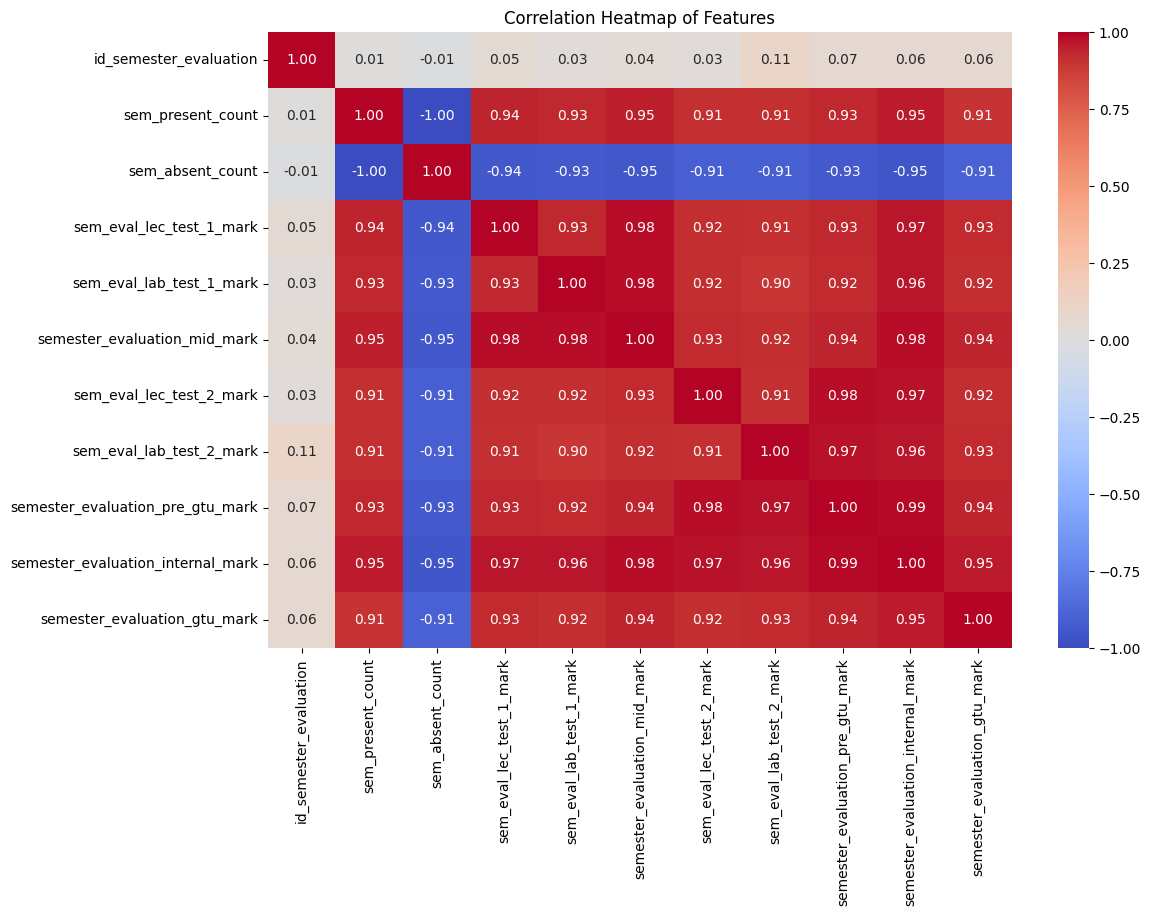

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


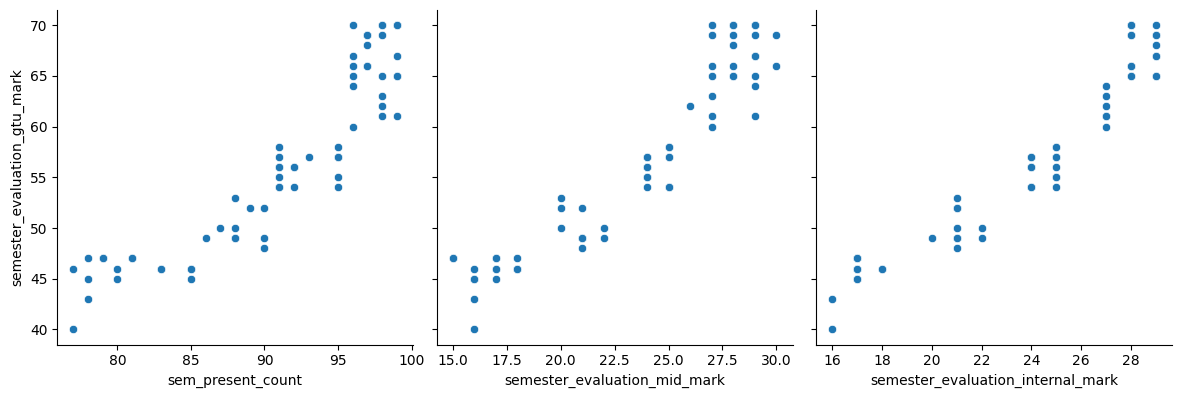

In [16]:
sns.pairplot(df, x_vars=['sem_present_count','semester_evaluation_mid_mark',
                         'semester_evaluation_internal_mark'],
             y_vars='semester_evaluation_gtu_mark', height=4, kind='scatter')
plt.show()


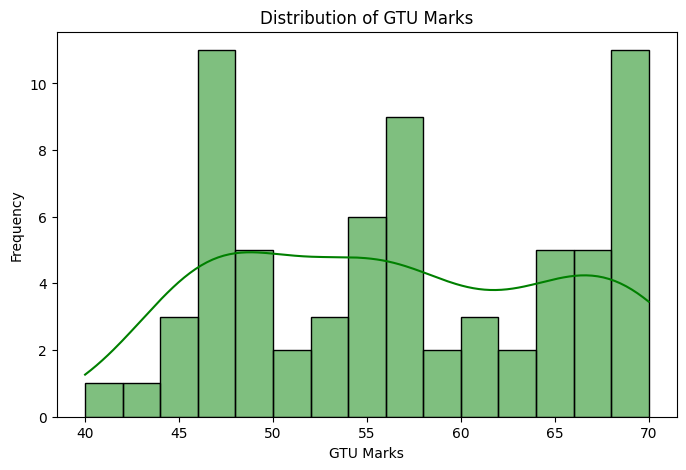

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['semester_evaluation_gtu_mark'], bins=15, kde=True, color='green')
plt.title("Distribution of GTU Marks")
plt.xlabel("GTU Marks")
plt.ylabel("Frequency")
plt.show()


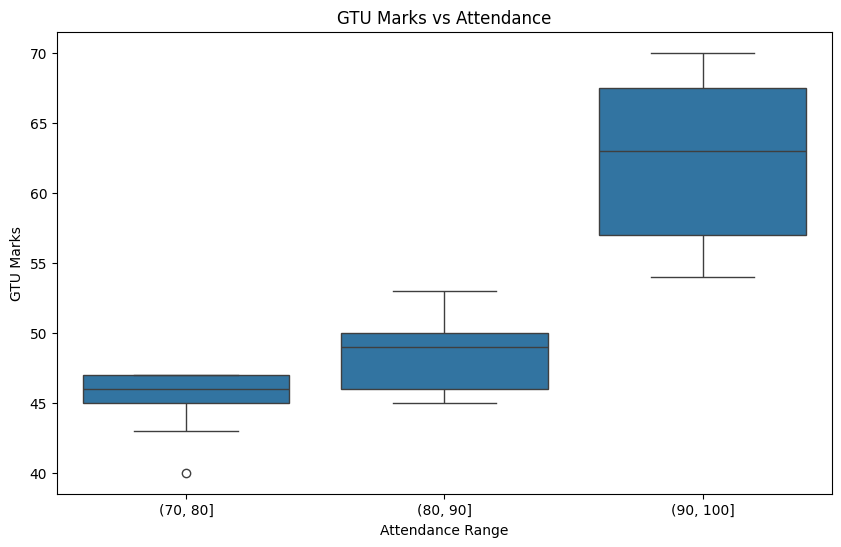

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=pd.cut(df['sem_present_count'], bins=[70,80,90,100]),
            y=df['semester_evaluation_gtu_mark'])
plt.title("GTU Marks vs Attendance")
plt.xlabel("Attendance Range")
plt.ylabel("GTU Marks")
plt.show()


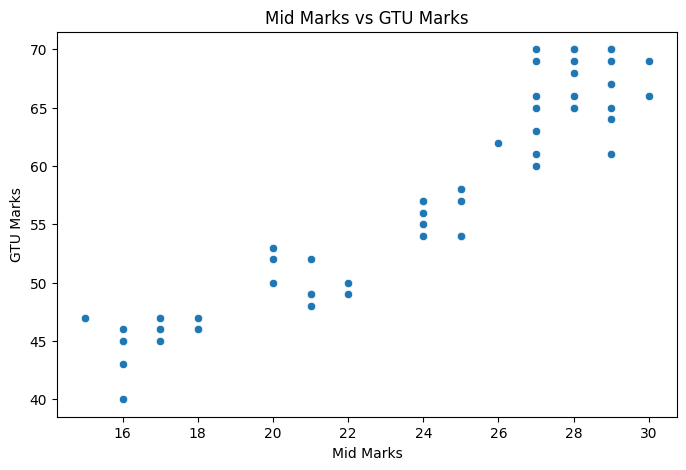

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='semester_evaluation_mid_mark', y='semester_evaluation_gtu_mark', data=df)
plt.title("Mid Marks vs GTU Marks")
plt.xlabel("Mid Marks")
plt.ylabel("GTU Marks")
plt.show()


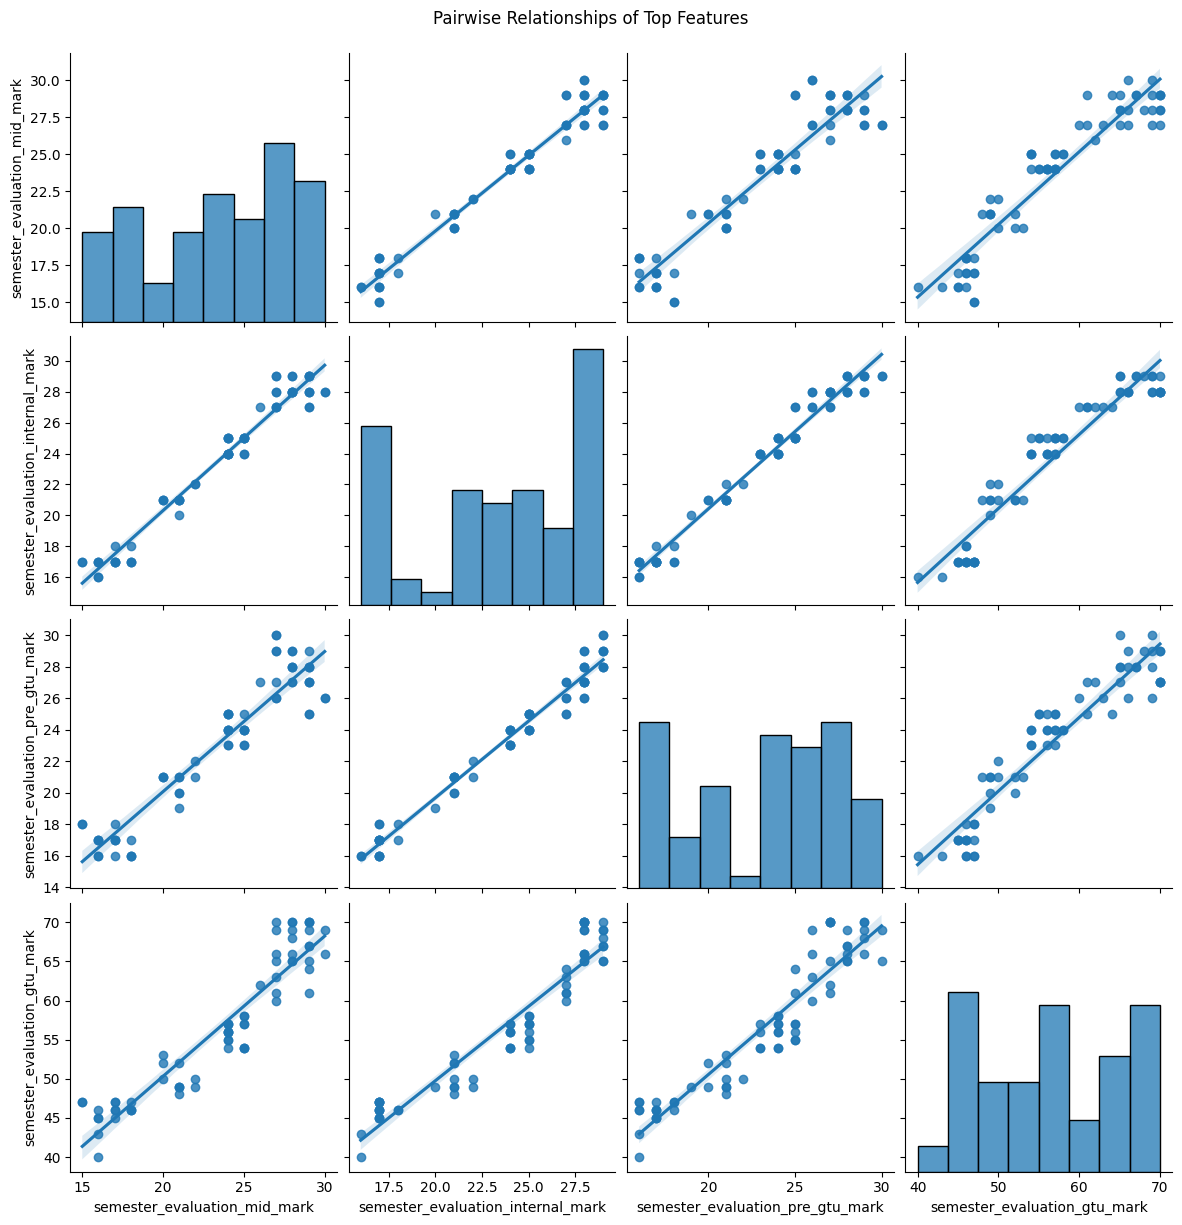

In [20]:
top_features = ['semester_evaluation_mid_mark', 'semester_evaluation_internal_mark',
                'semester_evaluation_pre_gtu_mark', 'semester_evaluation_gtu_mark']

sns.pairplot(df[top_features], kind='reg', height=3)
plt.suptitle("Pairwise Relationships of Top Features", y=1.02)
plt.show()
